# Task 1: Data checking

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('data.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Flight ID                      3000 non-null   int64  
 1   Airline                        3000 non-null   object 
 2   Flight_Distance                3000 non-null   int64  
 3   Origin_Airport                 3000 non-null   object 
 4   Destination_Airport            3000 non-null   object 
 5   Scheduled_Departure_Time       3000 non-null   int64  
 6   Day_of_Week                    3000 non-null   int64  
 7   Month                          3000 non-null   int64  
 8   Airplane_Type                  3000 non-null   object 
 9   Weather_Score                  3000 non-null   float64
 10  Previous_Flight_Delay_Minutes  3000 non-null   float64
 11  Airline_Rating                 3000 non-null   float64
 12  Passenger_Load                 3000 non-null   f

In [3]:
data = data.drop_duplicates()

#### Checking for missing values

In [4]:
missing_values = data.isnull().sum()

print(missing_values)

Flight ID                        0
Airline                          0
Flight_Distance                  0
Origin_Airport                   0
Destination_Airport              0
Scheduled_Departure_Time         0
Day_of_Week                      0
Month                            0
Airplane_Type                    0
Weather_Score                    0
Previous_Flight_Delay_Minutes    0
Airline_Rating                   0
Passenger_Load                   0
Flight_Cancelled                 0
dtype: int64


#### Checking and removing outliers using boxplots

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Flight ID                      3000 non-null   int64  
 1   Airline                        3000 non-null   object 
 2   Flight_Distance                3000 non-null   int64  
 3   Origin_Airport                 3000 non-null   object 
 4   Destination_Airport            3000 non-null   object 
 5   Scheduled_Departure_Time       3000 non-null   int64  
 6   Day_of_Week                    3000 non-null   int64  
 7   Month                          3000 non-null   int64  
 8   Airplane_Type                  3000 non-null   object 
 9   Weather_Score                  3000 non-null   float64
 10  Previous_Flight_Delay_Minutes  3000 non-null   float64
 11  Airline_Rating                 3000 non-null   float64
 12  Passenger_Load                 3000 non-null   f

<Axes: >

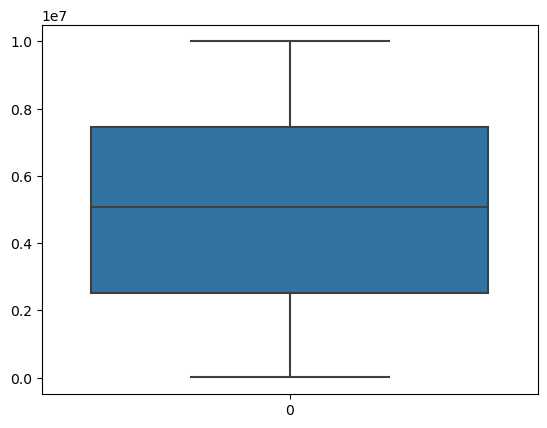

In [6]:
# Checking outliers for Flight Id column
import seaborn as sns
sns.boxplot(data['Flight ID'])

<Axes: >

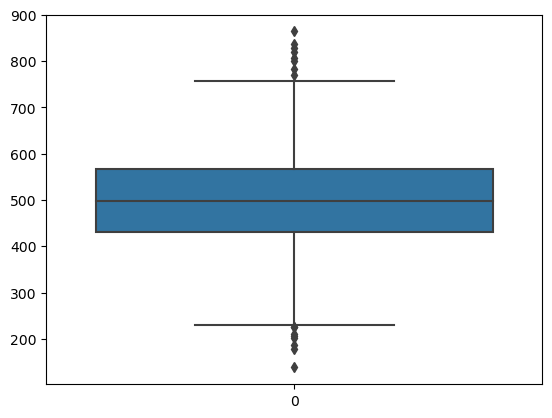

In [7]:
# Checking outliers for the Flight_Distance column
sns.boxplot(data['Flight_Distance'])

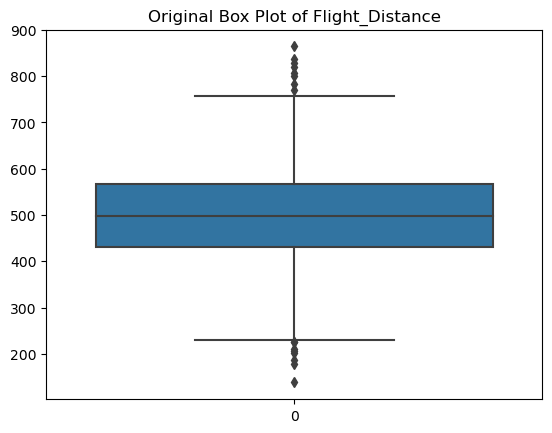

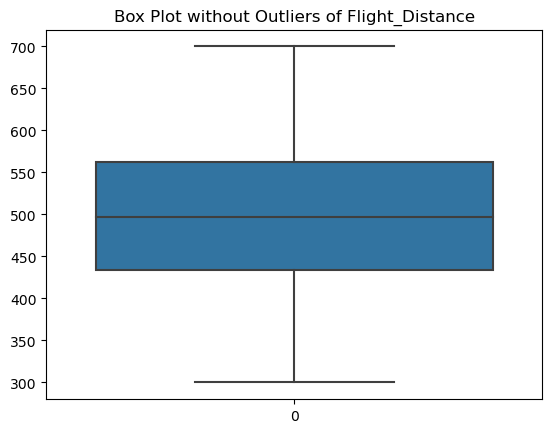

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

def removal_box_plot(data, column, lower_threshold, upper_threshold):
    sns.boxplot(data[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    removed_outliers = data[(data[column] >= lower_threshold) & (data[column] <= upper_threshold)]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()

    return removed_outliers

# Specify the threshold values
lower_threshold = 300
upper_threshold = 700

data_new = removal_box_plot(data, 'Flight_Distance', lower_threshold, upper_threshold)


<Axes: >

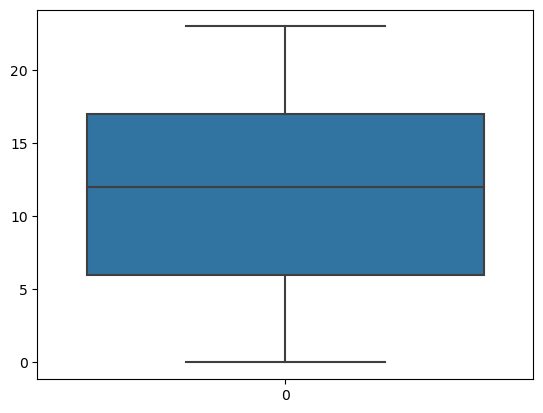

In [9]:
# Checking outliers for the Scheduled_Departure_Time column     
sns.boxplot(data_new['Scheduled_Departure_Time'])

<Axes: >

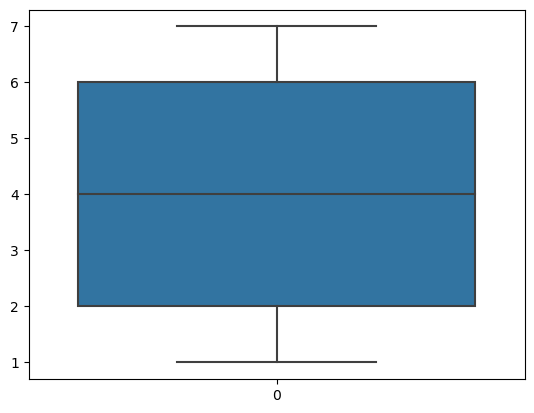

In [10]:
# Checking outliers for the Day_of_Week column     
sns.boxplot(data_new['Day_of_Week'])

<Axes: >

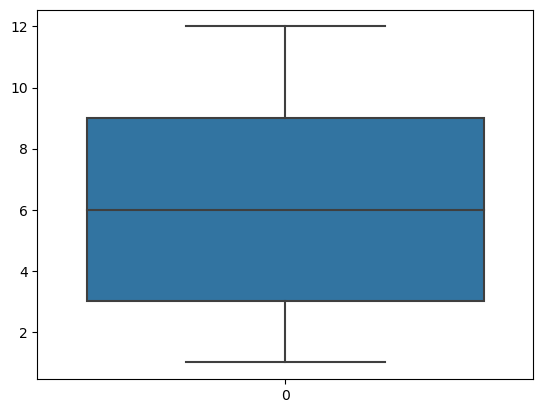

In [11]:
# Checking outliers for the Month column     
sns.boxplot(data_new['Month'])

<Axes: >

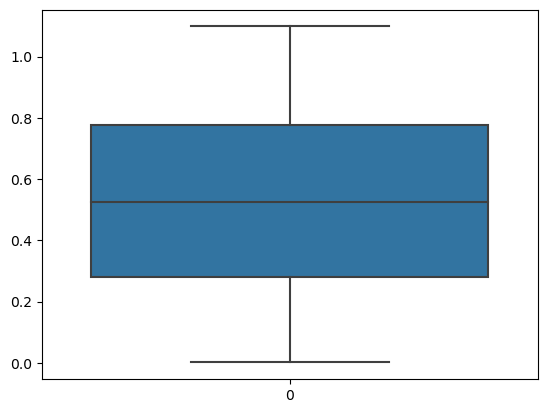

In [12]:
# Checking outliers for the Weather_Score column     
sns.boxplot(data_new['Weather_Score'])

<Axes: >

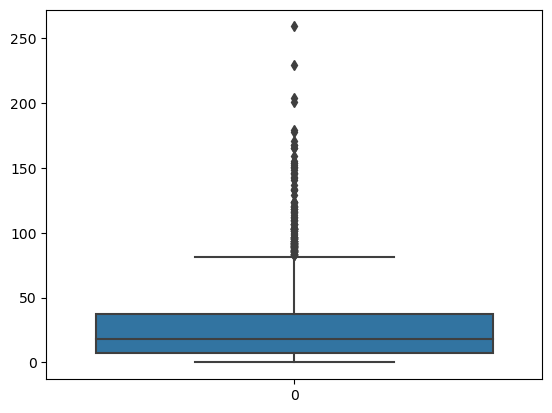

In [13]:
# Checking outliers for the Previous_Flight_Delay_Minutes column
sns.boxplot(data_new['Previous_Flight_Delay_Minutes'])

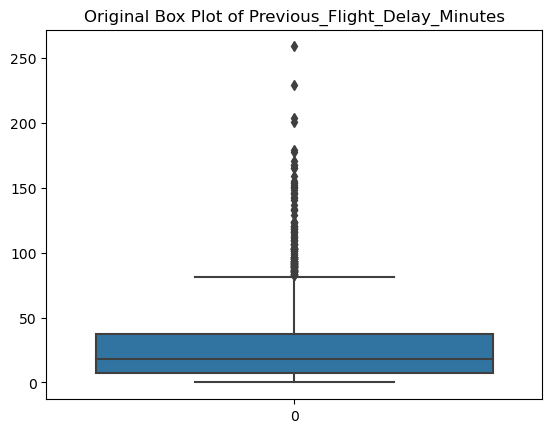

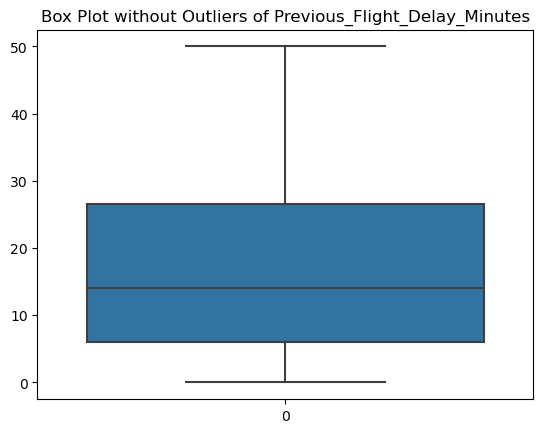

In [14]:
def removal_box_plot(data_new, column, threshold):
    sns.boxplot(data_new[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    removed_outliers = data_new[data_new[column] <= threshold]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    
    return removed_outliers

threshold_value = 50

data_new1 = removal_box_plot(data_new, 'Previous_Flight_Delay_Minutes', threshold_value)

<Axes: >

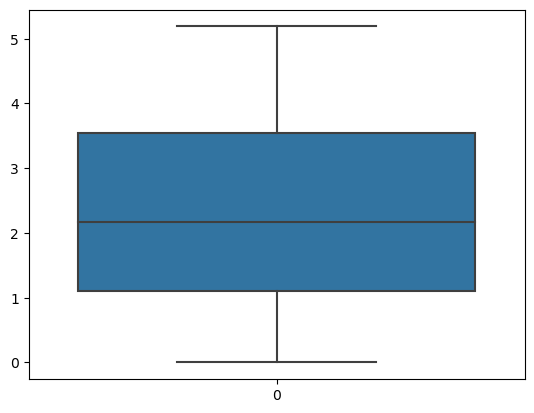

In [15]:
# Checking outliers for Airline_Rating column
sns.boxplot(data_new1['Airline_Rating'])

<Axes: >

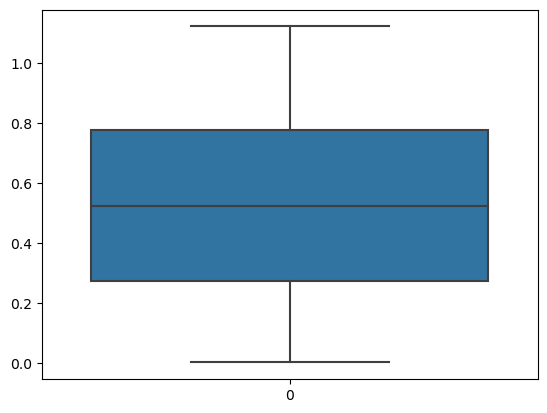

In [16]:
# Checking outliers for the Passenger_Load column
sns.boxplot(data_new1['Passenger_Load'])

<Axes: >

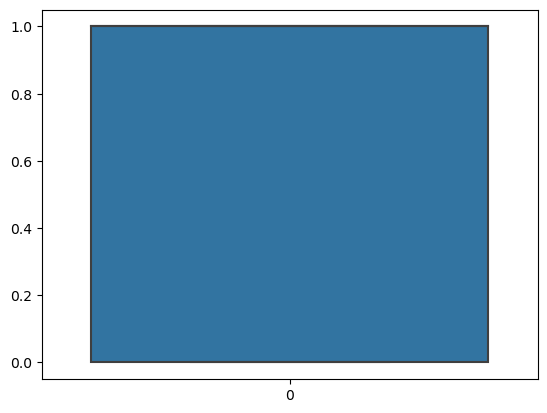

In [17]:
# Checking outliers for the Flight_Cancelled column
sns.boxplot(data_new1['Flight_Cancelled'])

#### Checking the data types for each column

In [18]:
print(data_new1.dtypes)

Flight ID                          int64
Airline                           object
Flight_Distance                    int64
Origin_Airport                    object
Destination_Airport               object
Scheduled_Departure_Time           int64
Day_of_Week                        int64
Month                              int64
Airplane_Type                     object
Weather_Score                    float64
Previous_Flight_Delay_Minutes    float64
Airline_Rating                   float64
Passenger_Load                   float64
Flight_Cancelled                   int64
dtype: object


In [19]:
data_new1.head()

,Flight ID,Airline,Flight_Distance,Origin_Airport,Destination_Airport,Scheduled_Departure_Time,Day_of_Week,Month,Airplane_Type,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled
0,7319483,Airline D,475,Airport 3,Airport 2,4,6,1,Type C,0.225122,5.0,2.151974,0.477202,0
2,2991718,Airline C,565,Airport 1,Airport 2,17,3,9,Type C,0.093920,18.0,4.406848,0.256803,0
3,4220106,Airline E,658,Airport 5,Airport 3,1,1,8,Type B,0.656750,13.0,0.998757,0.504077,1
4,2263008,Airline E,566,Airport 2,Airport 2,19,7,12,Type E,0.505211,4.0,3.806206,0.019638,0
5,9450813,Airline B,446,Airport 4,Airport 5,3,5,2,Type D,0.030072,5.0,2.228958,0.424126,0


##### The data types are appropriate for the data they represent.

# Task 2: Exploratory Data Analysis

#### Descriptive statistics

In [20]:
# For numeric columns
data_new1.describe()

,Flight ID,Flight_Distance,Scheduled_Departure_Time,Day_of_Week,Month,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled
count,2.454000e+03,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000
mean,5.013131e+06,499.320293,11.538712,3.962510,6.374491,0.530025,17.423073,2.337628,0.521403,0.629584
std,2.850340e+06,88.768593,6.953395,2.021345,3.491230,0.290777,13.732761,1.430148,0.294602,0.483014
min,3.681000e+03,300.000000,0.000000,1.000000,1.000000,0.000965,0.000000,0.000103,0.001039,0.000000
25%,2.588012e+06,435.000000,6.000000,2.000000,3.000000,0.281619,6.000000,1.100178,0.272121,0.000000
50%,5.136469e+06,497.000000,12.000000,4.000000,6.000000,0.528497,14.000000,2.164122,0.524155,1.000000
75%,7.457813e+06,564.000000,18.000000,6.000000,9.000000,0.781446,26.500003,3.544712,0.776592,1.000000
max,9.992513e+06,700.000000,23.000000,7.000000,12.000000,1.098354,50.000000,5.189038,1.123559,1.000000


Insights

The average flight distance is approximately 499.32 units, with a standard deviation of around 88.77 units.
The mean scheduled departure time is around 11:54 AM
The flights are fairly evenly distributed across the week.
Flights are slightly more frequent in April (month 4), with a mean month value of approximately 6.37 and a standard deviation of about 3.49.
The average weather score is approximately 0.53, with a standard deviation of around 0.29. This suggests that, on average, weather conditions are somewhat moderate.
The average previous flight delay is approximately 17.42 minutes, with a standard deviation of about 13.73 minutes. This indicates that there are often previous flight delays, which might impact subsequent flights.
Ratings range from very low to high, with a minimum value of around 0.1 and a maximum value of about 5.19.
The average passenger load is about 52.14%, with a standard deviation of approximately 29.46%, implying that on average flights are full.
The average flight cancellation rate is around 63%, with a standard deviation of about 48.3%. This indicates that a substantial portion of flights in the dataset were cancelled.

In [21]:
# For none numeric columns
data_new1.describe(include='object')

,Airline,Origin_Airport,Destination_Airport,Airplane_Type
count,2454,2454,2454,2454
unique,5,5,4,5
top,Airline A,Airport 1,Airport 2,Type A
freq,957,879,1340,941


Insights:

There are 5 unique airlines in the dataset.
The most frequent airline is "Airline A", with 957 occurrences.

There are 5 unique origin airports in the dataset.
The most frequent origin airport is "Airport 1", with 879 occurrences.

There are 4 unique destination airports in the dataset.
The most frequent destination airport is "Airport 2", with 1340 occurrences.

There are 5 unique airplane types in the dataset.
The most frequent airplane type is "Type A", with 941 occurrences.

#### Distribution of data

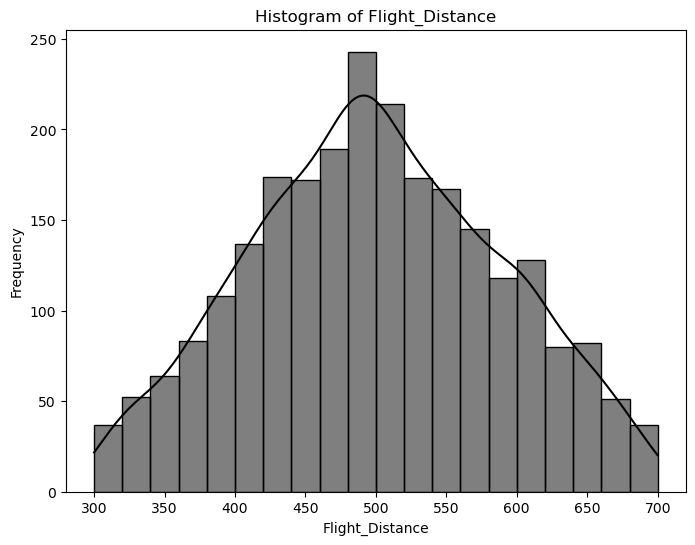

In [22]:
column_name = 'Flight_Distance'
plt.figure(figsize=(8, 6))
sns.histplot(data_new1['Flight_Distance'], kde=True, bins=20, color='black')
plt.title(f'Histogram of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

The Flight_Distance column exhibits a bell-shaped distribution, indicating that the distribution of flight distances follows a normal distribution.

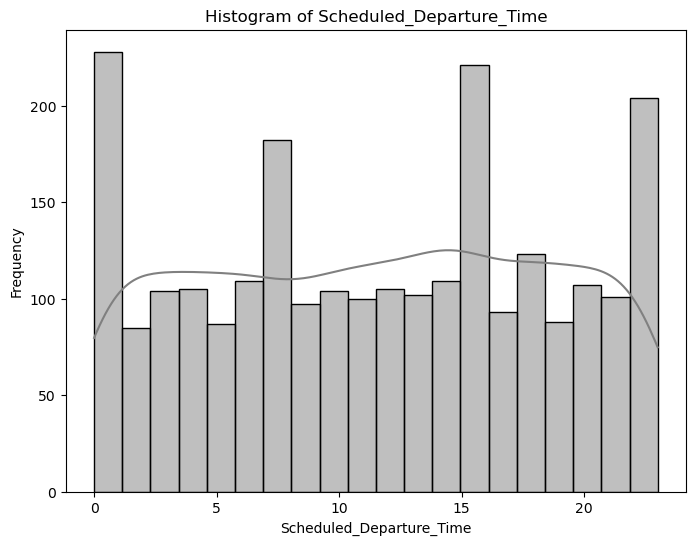

In [23]:
column_name = 'Scheduled_Departure_Time'
plt.figure(figsize=(8, 6))
sns.histplot(data_new1['Scheduled_Departure_Time'], kde=True, bins=20, color='grey')
plt.title(f'Histogram of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

The multimodal nature of the histogram suggests that flights may be scheduled at specific times to accommodate different travel preferences, operational constraints, or peak demand periods.

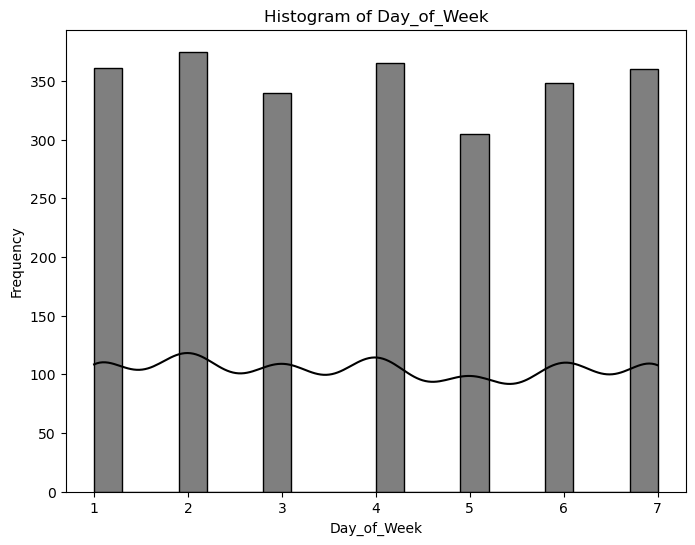

In [24]:
column_name = 'Day_of_Week'
plt.figure(figsize=(8, 6))
sns.histplot(data_new1['Day_of_Week'], kde=True, bins=20, color='black')
plt.title(f'Histogram of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

The wavy pattern indicates that the number of flights scheduled on different days of the week varies over time.

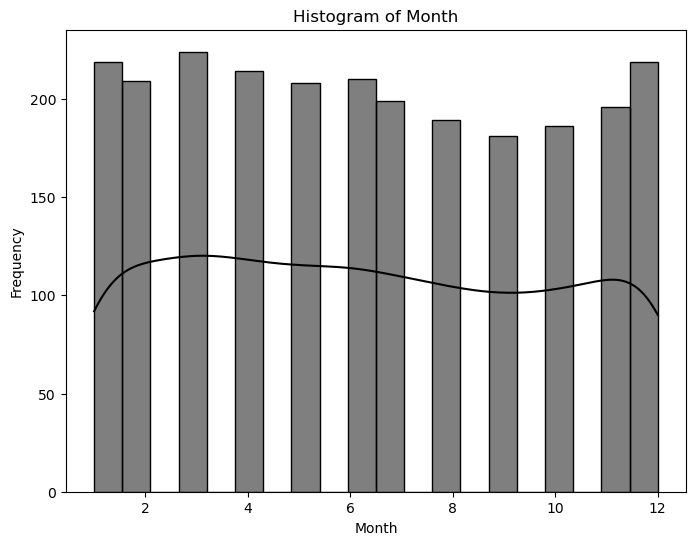

In [25]:
column_name = 'Month'
plt.figure(figsize=(8, 6))
sns.histplot(data_new1['Month'], kde=True, bins=20, color='black')
plt.title(f'Histogram of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

The curve indicates that the number of flights scheduled varies across different months of the year.

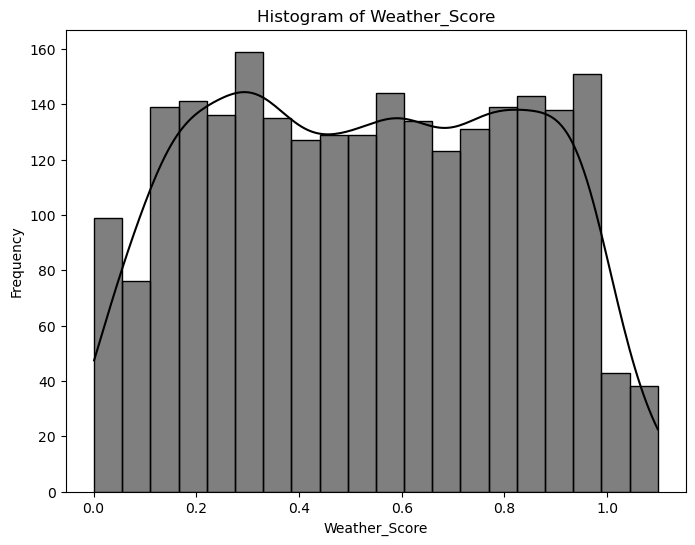

In [26]:
column_name = 'Weather_Score'
plt.figure(figsize=(8, 6))
sns.histplot(data_new1['Weather_Score'], kde=True, bins=20, color='black')
plt.title(f'Histogram of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

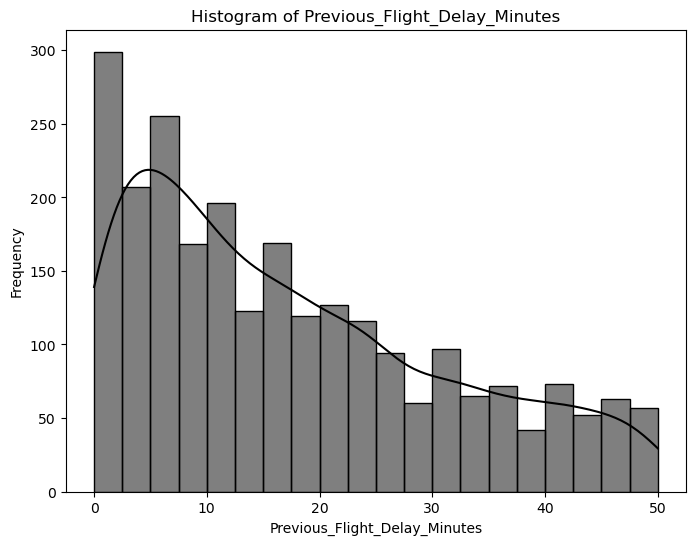

In [27]:
column_name = 'Previous_Flight_Delay_Minutes'
plt.figure(figsize=(8, 6))
sns.histplot(data_new1['Previous_Flight_Delay_Minutes'], kde=True, bins=20, color='black')
plt.title(f'Histogram of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

The right-skewed distribution suggests that the majority of flights experience shorter delays, with fewer flights experiencing longer delays

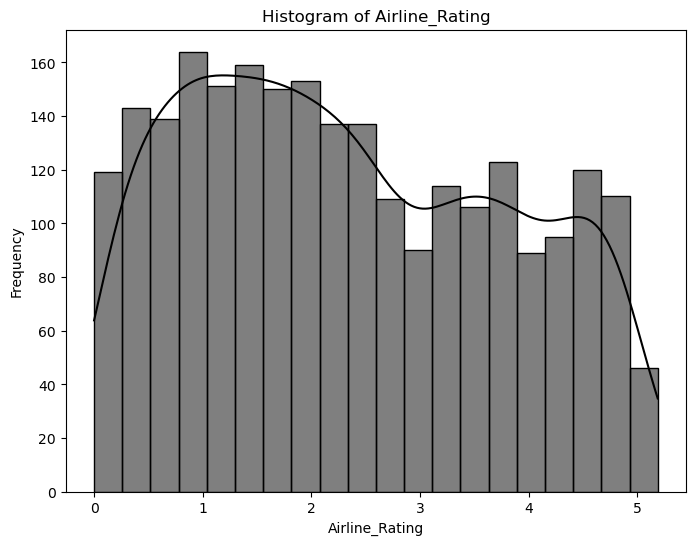

In [28]:
column_name = 'Airline_Rating'
plt.figure(figsize=(8, 6))
sns.histplot(data_new1['Airline_Rating'], kde=True, bins=20, color='black')
plt.title(f'Histogram of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

The presence of multiple peaks in the histogram indicates that airline ratings are not uniformly distributed but rather clustered into distinct groups.

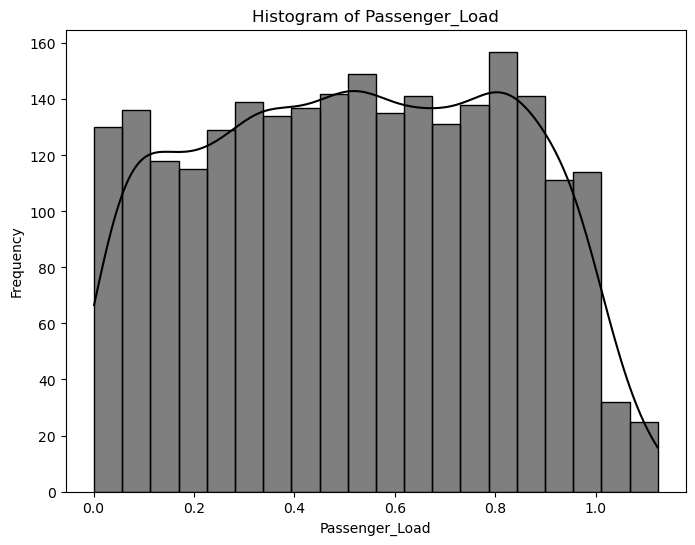

In [29]:
column_name = 'Passenger_Load'
plt.figure(figsize=(8, 6))
sns.histplot(data_new1['Passenger_Load'], kde=True, bins=20, color='black')
plt.title(f'Histogram of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

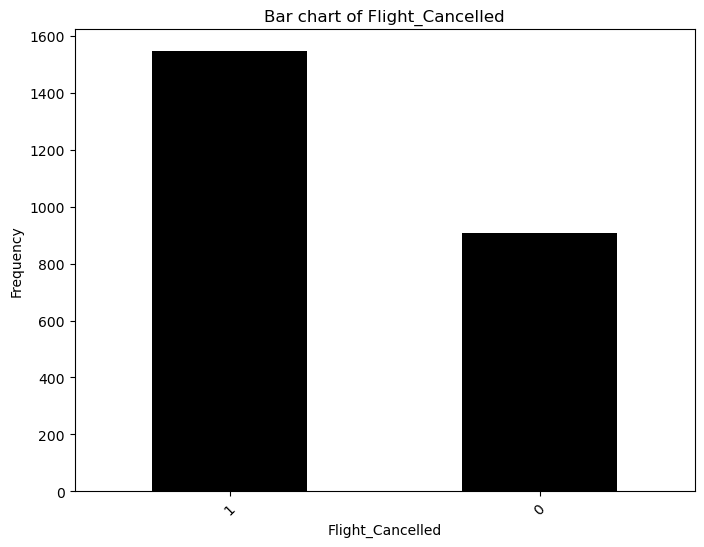

In [30]:
column_name= 'Flight_Cancelled'
plt.figure(figsize=(8, 6))
data_new1[column_name].value_counts().plot(kind='bar', color='black')
plt.title(f'Bar chart of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

The significantly higher frequency of bars for category 1 (flight cancelled) compared to category 0 (flight not cancelled) indicates that a substantial number of flights were cancelled according to the dataset.

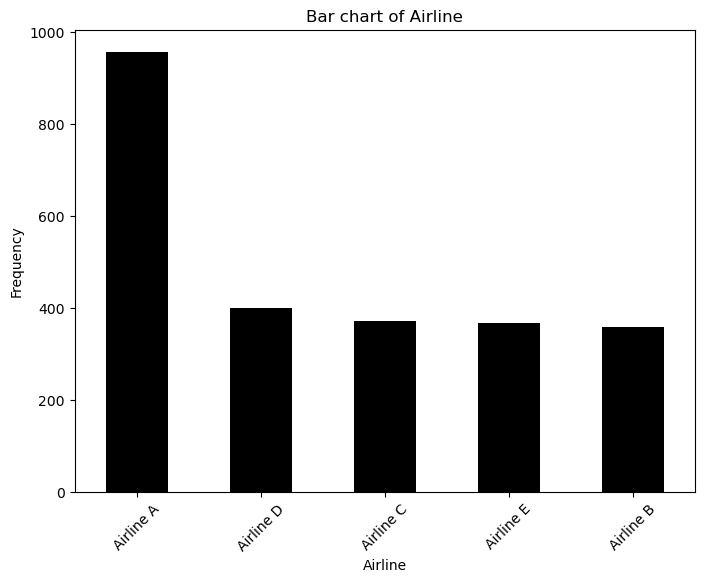

In [31]:
column_name= 'Airline'
plt.figure(figsize=(8, 6))
data_new1[column_name].value_counts().plot(kind='bar', color='black')
plt.title(f'Bar chart of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Airline A is the most frequent airline

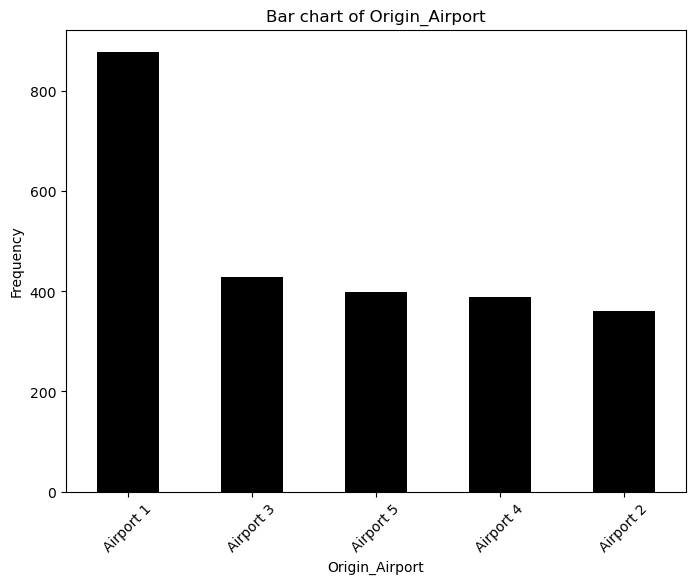

In [32]:
column_name= 'Origin_Airport'
plt.figure(figsize=(8, 6))
data_new1[column_name].value_counts().plot(kind='bar', color='black')
plt.title(f'Bar chart of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Airport 1 is the most frequently used origin airport

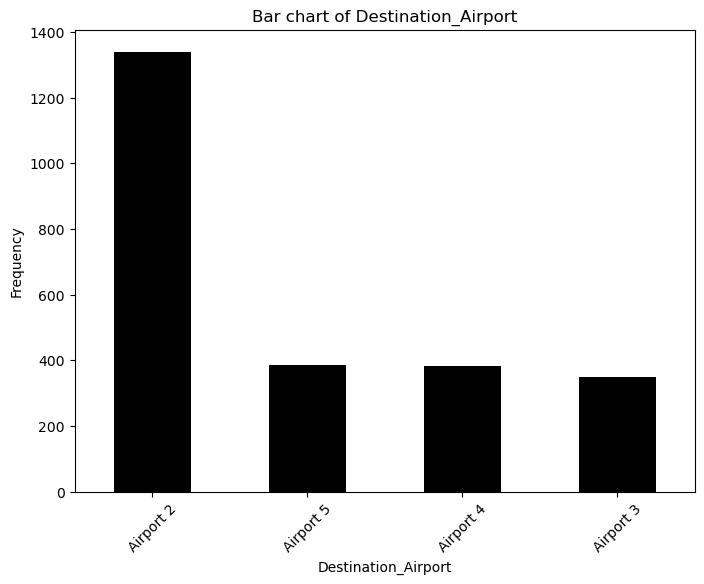

In [33]:
column_name= 'Destination_Airport'
plt.figure(figsize=(8, 6))
data_new1[column_name].value_counts().plot(kind='bar', color='black')
plt.title(f'Bar chart of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Airport 2 is the most frequently used destination airport

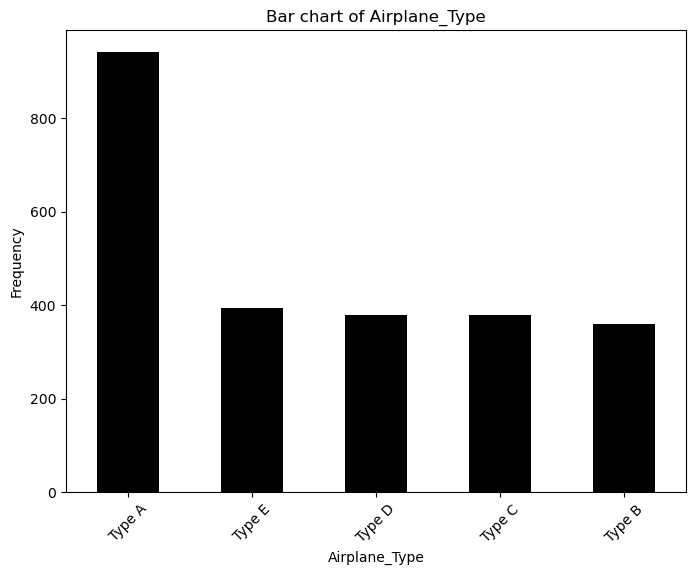

In [34]:
column_name= 'Airplane_Type'
plt.figure(figsize=(8, 6))
data_new1[column_name].value_counts().plot(kind='bar', color='black')
plt.title(f'Bar chart of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Airplane type A is the most frequent one.

### Relationship between features

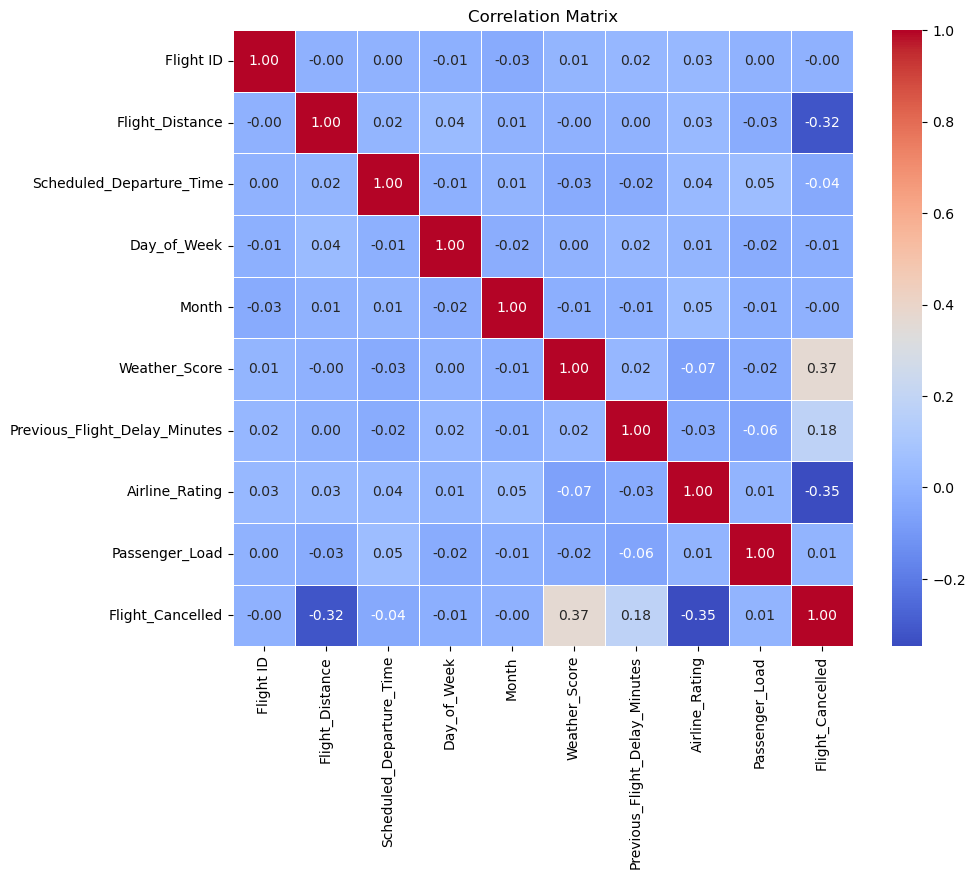

In [35]:
numerical_columns = ['Flight ID','Flight_Distance', 'Scheduled_Departure_Time', 'Day_of_Week', 'Month', 
                     'Weather_Score', 'Previous_Flight_Delay_Minutes', 'Airline_Rating', 
                     'Passenger_Load', 'Flight_Cancelled']  


correlation_matrix = data_new1[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

The correlation coefficient of 1 signifies a strong positive linear relationship between the variables. This means that when one variable increases, the other variable increases proportionally, and vice versa.

#### Relationship between features and target variable

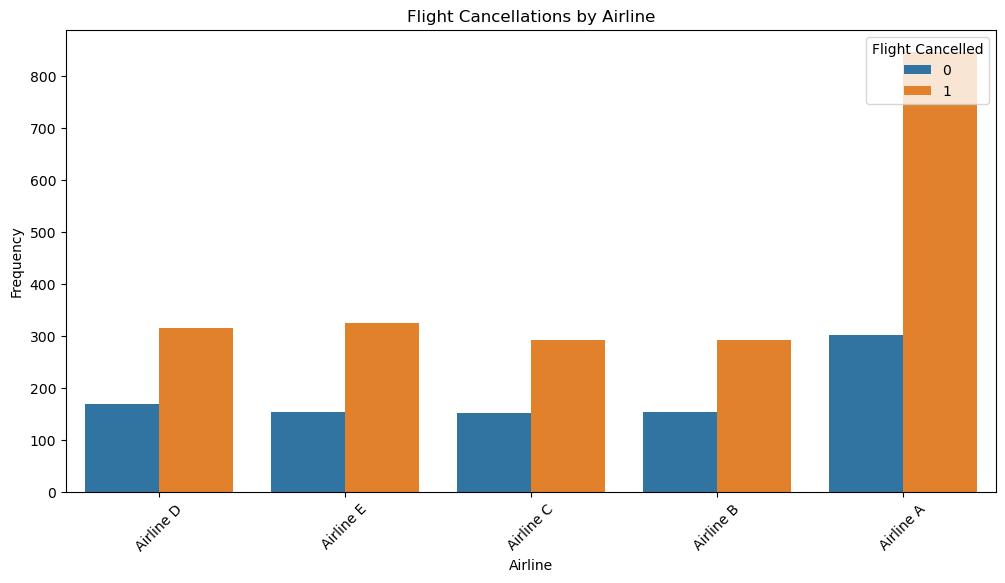

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(x='Airline', hue='Flight_Cancelled', data=data)
plt.title('Flight Cancellations by Airline')
plt.xlabel('Airline')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Flight Cancelled', loc='upper right')
plt.show()

There are more flight cancellations for Airline A which is the mostly used airline.

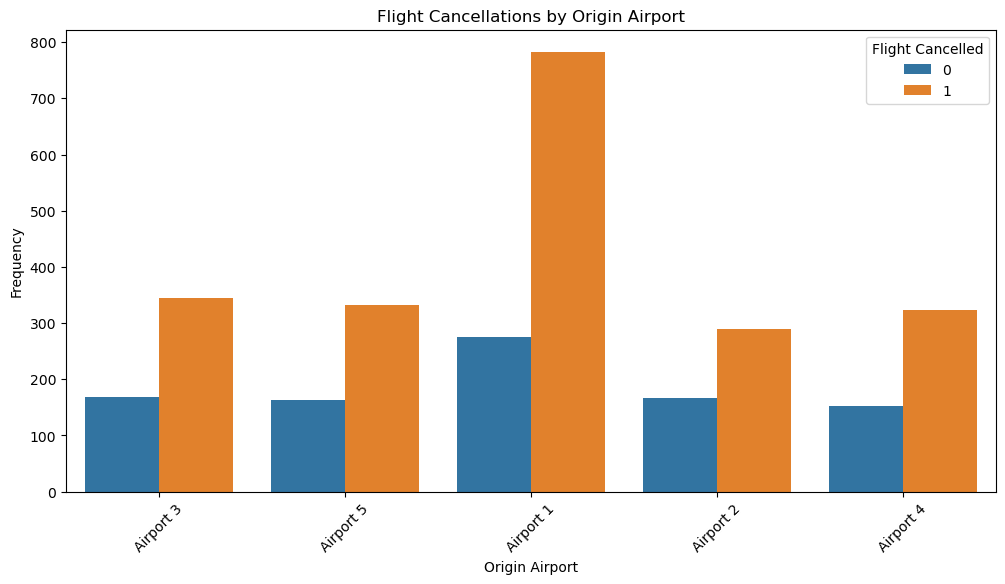

In [37]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Origin_Airport', hue='Flight_Cancelled', data=data)
plt.title('Flight Cancellations by Origin Airport')
plt.xlabel('Origin Airport')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Flight Cancelled', loc='upper right')
plt.show()

Origin airport 1 has the highets number of cancelled flights which is probably due to that it is the mostly used origin airport.

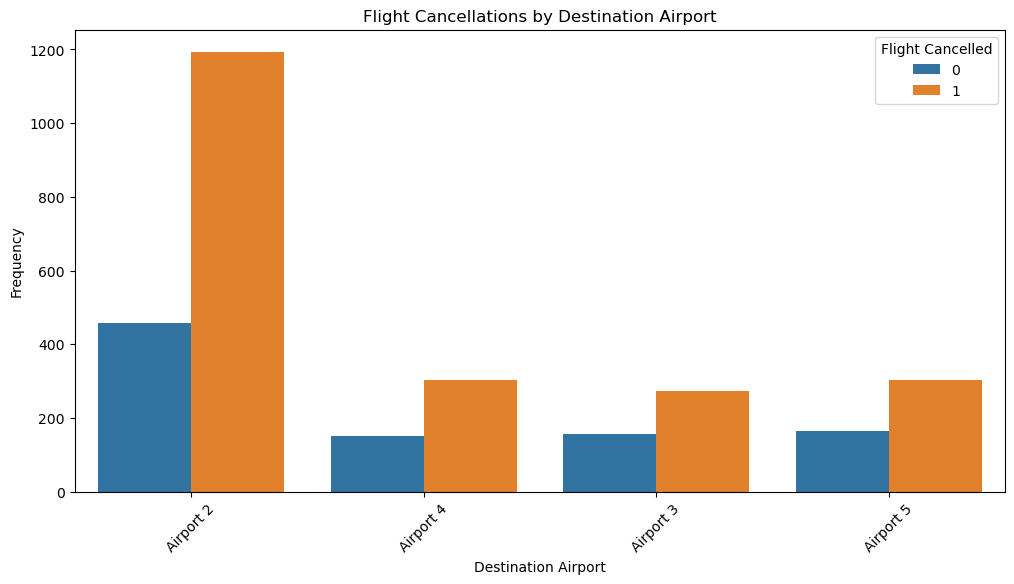

In [38]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Destination_Airport', hue='Flight_Cancelled', data=data)
plt.title('Flight Cancellations by Destination Airport')
plt.xlabel('Destination Airport')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Flight Cancelled', loc='upper right')
plt.show()

Destination airport 2 has the highest number of flight cancellations which is probably due to that it is the mostly used destination airport.

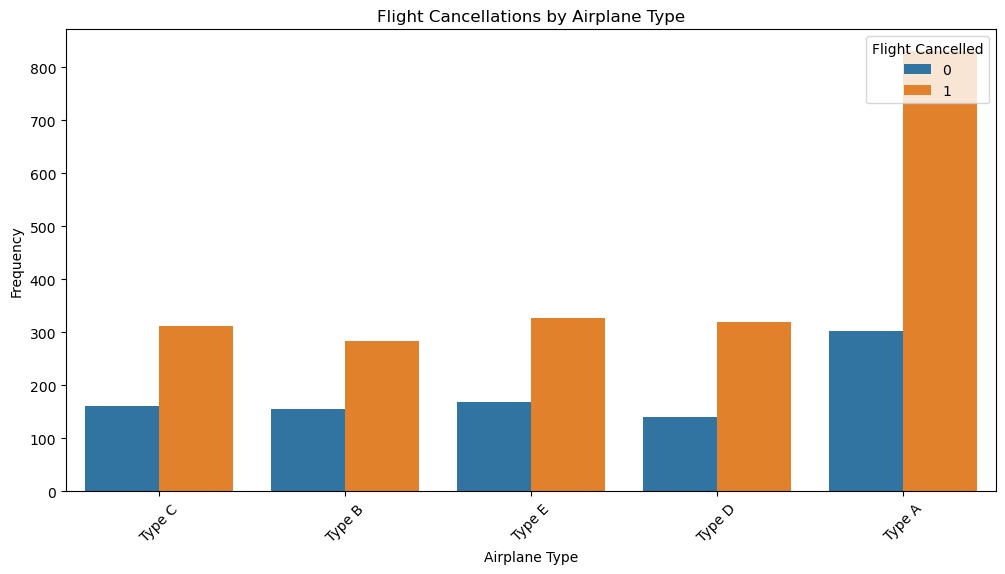

In [39]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Airplane_Type', hue='Flight_Cancelled', data=data)
plt.title('Flight Cancellations by Airplane Type')
plt.xlabel('Airplane Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Flight Cancelled', loc='upper right')
plt.show()

Airplane type A, which is the mostly used, has the highest number of flight cancellations.

In [40]:
# Correlation coefficients between numerical features and target variable
correlation_matrix = data_new1[numerical_columns + ['Flight_Cancelled']].corr()
correlation_with_target = correlation_matrix['Flight_Cancelled'].drop('Flight_Cancelled')
print('Correlation with Target Variable:')
print(correlation_with_target)

Correlation with Target Variable:
                               Flight_Cancelled  Flight_Cancelled
Flight ID                             -0.003791         -0.003791
Flight_Distance                       -0.317200         -0.317200
Scheduled_Departure_Time              -0.035845         -0.035845
Day_of_Week                           -0.011724         -0.011724
Month                                 -0.003768         -0.003768
Weather_Score                          0.367696          0.367696
Previous_Flight_Delay_Minutes          0.181291          0.181291
Airline_Rating                        -0.346962         -0.346962
Passenger_Load                         0.006253          0.006253


#### Weak Correlations:

Flight ID: The correlation coefficient (-0.003791) suggests an almost negligible linear relationship between flight ID and the likelihood of flight cancellation.
Scheduled Departure Time: With a correlation coefficient of -0.035845, there's a weak negative correlation. However, this relationship is not significant enough to draw concrete conclusions about its impact on flight cancellations.

Day of Week and Month: Both features exhibit weak negative correlations (approximately -0.01 and -0.004, respectively) with flight cancellations. These correlations indicate minimal influence of the day of the week or month on the probability of flight cancellation.

Passenger Load: The correlation coefficient (0.006253) indicates an extremely weak positive relationship between passenger load and flight cancellations, suggesting minimal impact.

#### Moderate Correlations:

Flight Distance: With a correlation coefficient of -0.317200, there's a moderate negative correlation. Longer flight distances are associated with a slightly lower likelihood of flight cancellation.

Previous Flight Delay Minutes: The correlation coefficient (0.181291) suggests a moderate positive relationship between previous flight delay minutes and the probability of flight cancellation. Flights with a history of delays are somewhat more likely to be cancelled.

#### Strong Correlations:

Weather Score: The correlation coefficient (0.367696) indicates a strong positive correlation. As weather conditions worsen (higher weather score), the likelihood of flight cancellation increases significantly.

Airline Rating: With a correlation coefficient of -0.346962, there's a strong negative correlation. Flights operated by airlines with higher ratings are notably less likely to be cancelled.

## Preprocessing and Model Building

#### Encoding categorical variables

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [42]:
# Selecting features and target variable
X = data_new1.drop(['Flight ID', 'Flight_Cancelled'], axis=1)  # Features
y = data_new1['Flight_Cancelled']  # target variables

In [43]:
# Performing one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X)

In [44]:
print(X_encoded.head())

   Flight_Distance  Scheduled_Departure_Time  Day_of_Week  Month  \
0              475                         4            6      1   
2              565                        17            3      9   
3              658                         1            1      8   
4              566                        19            7     12   
5              446                         3            5      2   

   Weather_Score  Previous_Flight_Delay_Minutes  Airline_Rating  \
0       0.225122                            5.0        2.151974   
2       0.093920                           18.0        4.406848   
3       0.656750                           13.0        0.998757   
4       0.505211                            4.0        3.806206   
5       0.030072                            5.0        2.228958   

   Passenger_Load  Airline_Airline A  Airline_Airline B  ...  \
0        0.477202              False              False  ...   
2        0.256803              False              False  ...

In [45]:
# Scaling numerical features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [46]:
# Displaying the scaled features
print(X_scaled)

[[0.4375     0.17391304 0.83333333 ... 1.         0.         0.        ]
 [0.6625     0.73913043 0.33333333 ... 1.         0.         0.        ]
 [0.895      0.04347826 0.         ... 0.         0.         0.        ]
 ...
 [0.4025     0.34782609 0.33333333 ... 0.         0.         0.        ]
 [0.41       0.2173913  0.66666667 ... 0.         0.         1.        ]
 [0.1725     0.04347826 0.         ... 0.         0.         0.        ]]


### Splitting the data into training and test sets

In [47]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Displaying the shapes of the training and test sets
print("Training set - Features:", X_train.shape, "Target:", y_train.shape)
print("Test set - Features:", X_test.shape, "Target:", y_test.shape)

Training set - Features: (1963, 27) Target: (1963,)
Test set - Features: (491, 27) Target: (491,)


### Model Building: Building a Logistic Regression model using the training data.

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
# Initializing the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

In [50]:
# Fitting the model to the training data
logreg_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [51]:
# Printing the model coefficients
print("Model Coefficients:", logreg_model.coef_)

Model Coefficients: [[-4.05734665e+00 -1.95376935e-01 -1.38971173e-01  1.24069904e-01
   3.79670784e+00  1.91013761e+00 -3.14213614e+00  1.46155579e-01
   5.21149350e-02 -1.10730210e-01  9.90813602e-03 -2.98796228e-03
   5.19983043e-02 -6.57591072e-02 -1.77487443e-01  7.89104208e-02
   1.00625367e-01  6.40139651e-02  8.56386910e-02 -9.58052322e-02
   1.26132230e-01 -1.15662486e-01  7.68659417e-02 -9.20226225e-02
  -2.04570934e-01  1.96977391e-01  2.30534262e-02]]


In [52]:
# Printing the model intercept
print("Model Intercept:", logreg_model.intercept_)

Model Intercept: [1.75311755]


### Model Evaluation: Evaluating the model using appropriate metrics and the test data.

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [54]:
# Predicting the target variable for the test set
y_pred = logreg_model.predict(X_test)

In [55]:
# Calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [56]:
# Printing the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.7841140529531568
Precision: 0.7945619335347432
Recall: 0.8737541528239202
F1-score: 0.8322784810126583
ROC AUC Score: 0.7579297079909075


### Task 4 -Build Other Classification Models

##### Decision Tree 

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [58]:
# Initializing the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

In [59]:
# Fitting the model to the training data
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [60]:
# Predicting the target variable for the test set
y_pred_dt = dt_model.predict(X_test)


In [61]:
# Calculating evaluation metrics for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)


In [62]:
# Printing the evaluation metrics for Decision Tree
print("\nDecision Tree Classifier Metrics:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-score:", f1_dt)
print("ROC AUC Score:", roc_auc_dt)


Decision Tree Classifier Metrics:
Accuracy: 0.9490835030549898
Precision: 0.9509803921568627
Recall: 0.9667774086378738
F1-score: 0.958813838550247
ROC AUC Score: 0.9439150201084106


##### Gradient boosting model

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

In [64]:
# Initializing the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

In [65]:
# Fitting the model to the training data
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [66]:
# Predicting the target variable for the test set
y_pred_gb = gb_model.predict(X_test)

In [67]:
# Calculating evaluation metrics for Gradient Boosting
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_gb)

In [68]:
# Print the evaluation metrics for Gradient Boosting
print("\nGradient Boosting Classifier Metrics:")
print("Accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("F1-score:", f1_gb)
print("ROC AUC Score:", roc_auc_gb)


Gradient Boosting Classifier Metrics:
Accuracy: 0.9796334012219959
Precision: 1.0
Recall: 0.9667774086378738
F1-score: 0.9831081081081081
ROC AUC Score: 0.9833887043189369


#### Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [70]:
# Initializing the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

In [71]:
# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

In [72]:
# Performing grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
167 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packa

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [73]:
# Getting the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


In [74]:
# Initializing the Random Forest Classifier with the best hyperparameters
best_rf_model = RandomForestClassifier(random_state=42, **best_params)

In [75]:
# Fitting the model to the training data
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=300,
                       random_state=42)

In [76]:
# Predicting the target variable for the test set
y_pred_rf = best_rf_model.predict(X_test)

In [77]:
# Calculating evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)


In [78]:
# Print the evaluation metrics
print("\nRandom Forest Classifier Metrics:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)
print("ROC AUC Score:", roc_auc_rf)


Random Forest Classifier Metrics:
Accuracy: 0.9796334012219959
Precision: 1.0
Recall: 0.9667774086378738
F1-score: 0.9831081081081081
ROC AUC Score: 0.9833887043189369


### Model comparison

In [79]:
# Print comparison of all models
print("\nModel Comparison:")
print("Model\t\t\tAccuracy\tPrecision\tRecall\t\tF1-score\tROC AUC")
print("Logistic Regression\t{:.4f}\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}".format(0.7841, 0.7946, 0.8738, 0.8323, 0.7579))
print("Decision Tree\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}".format(accuracy_dt, precision_dt, recall_dt, f1_dt, roc_auc_dt))
print("Random Forest\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}".format(accuracy_rf, precision_rf, recall_rf, f1_dt, roc_auc_rf))
print("Gradient Boosting\t{:.4f}\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}".format(accuracy_gb, precision_gb, recall_gb, f1_gb, roc_auc_gb))



Model Comparison:
Model			Accuracy	Precision	Recall		F1-score	ROC AUC
Logistic Regression	0.7841		0.7946		0.8738		0.8323		0.7579
Decision Tree		0.9491		0.9510		0.9668		0.9588		0.9439
Random Forest		0.9796		1.0000		0.9668		0.9588		0.9834
Gradient Boosting	0.9796		1.0000		0.9668		0.9831		0.9834


Logistic Regression:
Pros: Simple and interpretable model, computationally efficient.
Cons: Lower performance metrics compared to other models, suggesting it might not capture complex patterns in the data as effectively.

Decision Tree:
Pros: Improved performance over Logistic Regression, with high accuracy, precision, recall, and F1-score.
Cons: Prone to overfitting, as it can create very deep trees that perfectly fit the training data but generalize poorly to new data.

Random Forest:
Pros: Excellent performance metrics, handling overfitting better than Decision Trees by averaging multiple trees. High precision and recall indicate very few false positives and false negatives.
Cons: More complex and computationally intensive than Logistic Regression and Decision Trees. Slightly less interpretable due to the ensemble nature of the model.

Gradient Boosting:
Pros: Best overall performance, with high accuracy, precision, recall, and F1-score. It is especially good at handling imbalanced datasets and capturing complex patterns.
Cons: Computationally expensive and more challenging to tune than Random Forests. Also less interpretable.

Conclusion
Based on the performance metrics, both the Random Forest and Gradient Boosting models perform exceptionally well, with identical accuracy and very high precision, recall, and F1-scores.